In [2]:
import scanpy as sc
# only using primary somatosensory cortex (SSp)
adata = sc.read_h5ad(
    '../data/mouse_brain_adult.h5ad'
)
adult = adata[adata.obs.region_label == 'SSp', :].copy()
del adata

In [6]:
import pandas as pd
metadata = pd.read_csv(
    '../data/metaData_scDevSC.txt',
    sep = '\t',
    skiprows = [1]
)
metadata.index = metadata.NAME.to_list()
metadata.drop(
    columns = ['NAME'],
    inplace = True
)
metadata

,orig_ident,nCount_RNA,nFeature_RNA,percent_mito,n_hkgene,S_Score,G2M_Score,Phase,CC_Difference,seurat_clusters,...,donor_id,species,disease,disease__ontology_label,organ,organ__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,sex,species__ontology_label
E10_v1_AAACCTGAGGGTCTCC-1,E10,1544,1022,0.020078,51,0.356987,0.330795,S,0.026192,34,...,mouse_E10,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E10_v1_AAACCTGCACAACGCC-1,E10,1157,783,0.014693,39,0.453854,0.260560,S,0.193294,34,...,mouse_E10,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E10_v1_AAACCTGCACGACGAA-1,E10,2081,1200,0.016338,67,0.447598,0.218746,S,0.228852,34,...,mouse_E10,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E10_v1_AAACCTGCAGACAAGC-1,E10,2490,1430,0.021285,71,0.227723,0.307102,G2M,-0.079379,37,...,mouse_E10,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E10_v1_AAACCTGCAGAGCCAA-1,E10,2514,1416,0.021082,70,0.738406,0.136556,S,0.601850,37,...,mouse_E10,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P4_TTTGTCAGTTGATTGC-1,P4,8028,3130,0.064275,74,-0.225020,-0.244369,G1,0.019349,16,...,mouse_P4,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
P4_TTTGTCATCAACGGCC-1,P4,15768,4425,0.041540,79,-0.219746,-0.236435,G1,0.016689,24,...,mouse_P4,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
P4_TTTGTCATCCGTTGTC-1,P4,21692,4931,0.041398,76,-0.207196,-0.244800,G1,0.037604,16,...,mouse_P4,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
P4_TTTGTCATCGATGAGG-1,P4,3680,1897,0.057880,67,-0.185044,-0.185335,G1,0.000291,16,...,mouse_P4,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus


In [19]:
e10 = sc.read_10x_h5('../data/mouse_brain_E10_5.h5')
e10.var_names_make_unique()
e10.obs.index = ['E10_v1_' + i for i in e10.obs.index]
e10_metadata = metadata[metadata.index.str.startswith('E10')]
e10.obs = e10.obs.merge(
    e10_metadata,
    left_index = True,
    right_index = True,
    how = 'left'
)
e10 = e10[~e10.obs.isna().all(axis = 1), :].copy()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 1048 × 27998
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mito', 'n_hkgene', 'S_Score', 'G2M_Score', 'Phase', 'CC_Difference', 'seurat_clusters', 'RNA_snn_res_1', 'scrublet_doublet', 'RNA_snn_res_2', 'Doublet_intersect', 'Gral_cellType', 'New_cellType', 'biosample_id', 'donor_id', 'species', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'sex', 'species__ontology_label'
    var: 'gene_ids'

In [35]:
data = {
    'adult': adult
}
for label, file in zip(
    ['E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'P4'],
    [
        'mouse_brain_E10_5.h5',
        'mouse_brain_E11_5.h5',
        'mouse_brain_E12_5.h5',
        'mouse_brain_E13_5.h5',
        'mouse_brain_E14_5.h5',
        'mouse_brain_E15_5.h5',
        'mouse_brain_E16_5.h5',
        'mouse_brain_E17_5.h5',
        'mouse_brain_P4.h5'
    ]
):
    adata = sc.read_10x_h5(f'../data/{file}')
    adata.var_names_make_unique()
    adata_metadata = metadata[metadata.index.str.startswith(label)]
    index_sample = adata_metadata.index[0]
    index_prefix = '_'.join(index_sample.split('_')[:-1])
    if not index_sample.endswith('-1'):
        adata.obs.index = [index_prefix + '_' + i[:-2] for i in adata.obs.index]
    
    else:
        adata.obs.index = [index_prefix + '_' + i for i in adata.obs.index]
        
    adata.obs = adata.obs.merge(
        adata_metadata,
        left_index = True,
        right_index = True,
        how = 'left'
    )
    data[label] = adata[~adata.obs.isna().all(axis = 1), :].copy()
data

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


{'adult': AnnData object with n_obs × n_vars = 81050 × 31053
     obs: 'cl', 'donor_label', 'sex_label', 'region_label', 'gene.counts', 'library_label', 'platform_label', 'joint_region_color', 'joint_region_id', 'joint_region_label', 'region_id', 'region_color', 'sex_color', 'sex_id', 'platform_color', 'platform_id', 'tasic18_cluster_id', 'tasic18_cluster_label', 'tasic18_cluster_color', 'tasic18_subclass_id', 'tasic18_subclass_label', 'tasic18_subclass_color', 'tasic18_class_id', 'tasic18_class_label', 'tasic18_class_color', 'Miniatlas_cluster_id', 'Miniatlas_cluster_label', 'Miniatlas_cluster_color', 'genes_label', 'genes_norm', 'genes_color', 'cluster_id', 'cluster_label', 'ref.cluster_label', 'old.cluster_label', 'label', 'cluster_color', 'supertype_id', 'supertype_label', 'supertype_color', 'subclass_id', 'subclass_label', 'subclass_color', 'neighborhood_id', 'neighborhood_label', 'neighborhood_color', 'class_id', 'class_label', 'class_color', 'ss_cluster_id', 'ss_cluster_color', 

In [38]:
metadata[metadata.index.str.startswith('E18')]

,orig_ident,nCount_RNA,nFeature_RNA,percent_mito,n_hkgene,S_Score,G2M_Score,Phase,CC_Difference,seurat_clusters,...,donor_id,species,disease,disease__ontology_label,organ,organ__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,sex,species__ontology_label
E18_5_S1_AAACCTGAGAGAGCTC,E18_S1,2142,1146,0.055556,67,-0.083741,-0.033232,G1,-0.050510,14,...,mouse_E18_S1,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E18_5_S1_AAACCTGAGATGTTAG,E18_S1,3192,1435,0.046679,71,-0.061365,-0.089794,G1,0.028429,1,...,mouse_E18_S1,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E18_5_S1_AAACCTGAGTACGTAA,E18_S1,5308,2040,0.042766,73,-0.146747,-0.126563,G1,-0.020184,4,...,mouse_E18_S1,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E18_5_S1_AAACCTGAGTGAACAT,E18_S1,2710,1262,0.057196,70,-0.097507,-0.071892,G1,-0.025615,1,...,mouse_E18_S1,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E18_5_S1_AAACCTGCAACCGCCA,E18_S1,4289,1745,0.048962,72,-0.148113,-0.162288,G1,0.014175,1,...,mouse_E18_S1,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E18_S3_TTTGTCAGTTTGACAC,E18_S3,2802,1460,0.032834,69,-0.147341,-0.144956,G1,-0.002386,0,...,mouse_E18_S3,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E18_S3_TTTGTCATCACCTTAT,E18_S3,4980,2137,0.028514,77,-0.034504,-0.136956,G1,0.102452,7,...,mouse_E18_S3,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E18_S3_TTTGTCATCATAACCG,E18_S3,3538,1754,0.023742,72,-0.195421,-0.079418,G1,-0.116003,7,...,mouse_E18_S3,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus
E18_S3_TTTGTCATCCAGGGCT,E18_S3,1610,984,0.010559,60,-0.027222,-0.063585,G1,0.036362,24,...,mouse_E18_S3,NCBITaxon_10090,PATO_0000461,normal,UBERON_0008930,somatosensory cortex,EFO_0009899,10X 3' v2 sequencing,mixed,Mus musculus


In [54]:
import anndata as ad
adata1 = sc.read_10x_h5('../data/mouse_brain_E18_5_rep1.h5')
adata1.var_names_make_unique()
adata1.obs.index = ['E18_5_S1_' + i[:-2] for i in adata1.obs.index]
adata1_metadata = metadata[metadata.index.str.startswith('E18_5_S1')]
adata1.obs = adata1.obs.merge(
    adata1_metadata,
    left_index = True,
    right_index = True,
    how = 'left'
)
adata1 = adata1[~adata1.obs.isna().all(axis = 1), :].copy()

adata2 = sc.read_10x_h5('../data/mouse_brain_E18_5_rep2.h5')
adata2.var_names_make_unique()
adata2.obs.index = ['E18_S3_' + i[:-2] for i in adata2.obs.index]
adata2_metadata = metadata[metadata.index.str.startswith('E18_S3')]
adata2.obs = adata2.obs.merge(
    adata2_metadata,
    left_index = True,
    right_index = True,
    how = 'left'
)
adata2 = adata2[~adata2.obs.isna().all(axis = 1), :].copy()
adata = ad.concat([adata1, adata2])
adata.obs.loc[:, 'orig_ident'] = 'E18'
data['E18'] = adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [55]:
import anndata as ad
adata1 = sc.read_10x_h5('../data/mouse_brain_P1_rep1.h5')
adata1.var_names_make_unique()
adata1.obs.index = ['P1_S1_' + i[:-2] for i in adata1.obs.index]
adata1_metadata = metadata[metadata.index.str.startswith('P1_S1')]
adata1.obs = adata1.obs.merge(
    adata1_metadata,
    left_index = True,
    right_index = True,
    how = 'left'
)
adata1 = adata1[~adata1.obs.isna().all(axis = 1), :].copy()

adata2 = sc.read_10x_h5('../data/mouse_brain_P1_rep2.h5')
adata2.var_names_make_unique()
adata2.obs.index = ['P1_S2_' + i[:-2] for i in adata2.obs.index]
adata2_metadata = metadata[metadata.index.str.startswith('P1_S2')]
adata2.obs = adata2.obs.merge(
    adata2_metadata,
    left_index = True,
    right_index = True,
    how = 'left'
)
adata2 = adata2[~adata2.obs.isna().all(axis = 1), :].copy()
adata = ad.concat([adata1, adata2])
adata.obs.loc[:, 'orig_ident'] = 'P1'
data['P1'] = adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [56]:
cell_grouping = pd.read_excel(
    '../meta/scRNASeq_datasets_wt_groups.xlsx', 
    sheet_name = None
)
cell_grouping

{'Allen_Brain_Atlas_IN':       class_label subclass_label  subclass_id
 0       GABAergic           Sncg            4
 1       GABAergic          Lamp5            3
 2       GABAergic          Lamp5            3
 3       GABAergic          Lamp5            3
 4       GABAergic          Lamp5            3
 ..            ...            ...          ...
 370  Non-Neuronal          Oligo           37
 371  Non-Neuronal          Oligo           37
 372  Non-Neuronal          Astro           38
 373  Non-Neuronal          Astro           38
 374  Non-Neuronal          Astro           38
 
 [375 rows x 3 columns],
 'Allen_Brain_Atlas_OUT':       class_label subclass_label  subclass_id
 0   Glutamatergic             CR            1
 1       GABAergic          Meis2            2
 2       GABAergic          Meis2            2
 3    Non-Neuronal           Endo           39
 4    Non-Neuronal       SMC-Peri           40
 5    Non-Neuronal       SMC-Peri           40
 6    Non-Neuronal       SMC-Pe

In [57]:
# remove bad cells
rem_cellids = cell_grouping['Di_Bella_OUT'].subclass_label.str.strip().str.lower().to_list() + ['low quality cells', 'doublet', 'cajal retzius cells']
for key, adata in data.items():
    if key == 'adult':
        continue
    
    else:
        data[key] = adata[~adata.obs.New_cellType.str.lower().isin(rem_cellids)].copy()

In [61]:
# annotate class labels
group_assignment = {
    row['subclass_label'].strip().lower(): row['class_label'].strip() for i, row in cell_grouping['Di_Bella_IN'].iterrows()
}
group_assignment['astrocytes'] = 'Non-Neuronal'
group_assignment['dl_cpn_1'] = 'Mature Glutamatergic'
group_assignment['dl_cpn_2'] = 'Mature Glutamatergic'
group_assignment['dl cpn'] = 'Mature Glutamatergic'
group_assignment['oligodendrocytes'] = 'Non-Neuronal'
group_assignment['layer 4'] = 'Mature Glutamatergic'
group_assignment['ul cpn'] = 'Mature Glutamatergic'
group_assignment['cycling glial cells'] = 'Non-Neuronal'
group_assignment['layer 6b'] = 'Mature Glutamatergic'

for key, adata in data.items():
    if key == 'adult':
        continue
    
    else:
        adata.obs['class_label'] = adata.obs.New_cellType.str.lower().apply(
            lambda x: group_assignment[x]
        )

In [62]:
# remove cells; adult does not need to be relabelled since it already contains this labelling so only removal is done here
rem_cellids = cell_grouping['Allen_Brain_Atlas_OUT'].subclass_label.str.strip().str.lower().unique()
data['adult'] = data['adult'][~data['adult'].obs.subclass_label.str.lower().isin(rem_cellids), :].copy()

In [63]:
data['adult'].obs.loc[:, 'class_label'] = data['adult'].obs.class_label.apply(
    lambda x: 'Mature ' + x if x == 'Glutamatergic' else x
)

In [64]:
keep_adult = ['class_label', 'subclass_label']
data['adult'].obs = data['adult'].obs.loc[:, keep_adult]

In [65]:
for key, adata in data.items():
    if key == 'adult':
        continue
    
    else:
        adata.obs = adata.obs.loc[:, ['class_label', 'New_cellType']]
        adata.obs.rename(
            columns = {
                'New_cellType': 'subclass_label'
            },
            inplace = True
        )

In [68]:
for key, adata in data.items():
    adata.obs['developmental_stage'] = key

adata = ad.concat(data.values())

In [75]:
adata.write(
    '../data/mouse_brain_dev_E10_to_adult.h5ad'
)

/users/daniel.malzl/.conda/envs/nova/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'class_label' as categorical
/users/daniel.malzl/.conda/envs/nova/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'subclass_label' as categorical
/users/daniel.malzl/.conda/envs/nova/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and w

In [2]:
import scanpy as sc
adata = sc.read_h5ad(
    '../data/mouse_brain_dev_E10_to_adult.h5ad'
)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata)

In [3]:
# this is downloaded from KEGG see metabo_analysis.ipynb
import pickle
with open('../raw/kegg_pathway_maps.pickle', 'rb') as handle:
    pathwaymaps = pickle.load(handle)

In [5]:
import pandas as pd
selection_df = pd.DataFrame(
    [
        ['Glycolysis', 'mmu00010', 'M00001'],
        ['TCA cycle', 'mmu00020', 'M00009'],
        ['Fatty acid degradation', 'mmu00071', '-'],
        ['Oxidative phosphorylation', 'mmu00190', '-'],
        ['Valine, Leucine and Isoleucine degradation', 'mmu00280', '-'],
        ['Pyruvate metabolism', 'mmu00620', '-'],
        ['Linoleic acid metabolism', 'mmu00591', '-'],
        ['Arachidonic acid metabolism', 'mmu00590', '-'],
        ['Glycerophospholipid metabolism', 'mmu00564', '-'],
        ['Glycerolipid metabolism', 'mmu00561', '-']
    ],
    columns = ['pathway', 'kegg_map', 'kegg_module']
)
selection_df

selected_pathways = {k:pathwaymaps[k] for k in selection_df.kegg_map}

In [6]:
def get_pathway_genes(pathways):
    genes = []
    for name, pathway in pathways.items():
        if 'GENE' in pathway:
            for ncbid, gene in pathway['GENE'].items():
                if gene.get('genesymbol'):
                    genes.append(
                        [
                            ncbid,
                            gene['genesymbol'],
                            name
                        ]
                    )
    
    df = pd.DataFrame(
        genes, 
        columns = ['ncbi_id', 'genesymbol', 'kegg_map']
    )
    df.drop_duplicates(
        subset = ['ncbi_id'],
        inplace = True
    )
    return df

pathway_genes = get_pathway_genes(selected_pathways)
pathway_genes = pathway_genes.merge(
    selection_df.loc[:, ['pathway', 'kegg_map']],
    on = 'kegg_map',
    how = 'left'
)
pathway_genes

,ncbi_id,genesymbol,kegg_map,pathway
0,15277,Hk2,mmu00010,Glycolysis
1,212032,Hk3,mmu00010,Glycolysis
2,15275,Hk1,mmu00010,Glycolysis
3,216019,Hkdc1,mmu00010,Glycolysis
4,103988,Gck,mmu00010,Glycolysis
...,...,...,...,...
499,69923,Agk,mmu00561,Glycerolipid metabolism
500,23945,Mgll,mmu00561,Glycerolipid metabolism
501,68393,Mogat1,mmu00561,Glycerolipid metabolism
502,233549,Mogat2,mmu00561,Glycerolipid metabolism


In [7]:
adata.obs.groupby(['developmental_stage', 'class_label']).count()

subclass_label
developmental_stage class_label                           
E10                 GABAergic                            0
                    Immature Glutamatergic               0
                    Mature Glutamatergic                 0
                    Non-Neuronal                         0
                    Progenitors                        964
E11                 GABAergic                            0
                    Immature Glutamatergic             111
                    Mature Glutamatergic                 0
                    Non-Neuronal                         0
                    Progenitors                       2250
E12                 GABAergic                            0
                    Immature Glutamatergic            1084
                    Mature Glutamatergic                 0
                    Non-Neuronal                         0
                    Progenitors                       5898
E13                 GABAergic                           48
                    Immature Glutamatergic            1440
                    Mature Glutamatergic                 0
                    Non-Neuronal                         0
                    Progenitors                       4483
E14                 GABAergic                          119
                    Immature Glutamatergic            1284
                    Mature Glutamatergic               632
                    Non-Neuronal                         0
                    Progenitors                       1058
E15                 GABAergic                          580
                    Immature Glutamatergic            3001
                    Mature Glutamatergic              2333
                    Non-Neuronal                         0
                    Progenitors                       4207
E16                 GABAergic                          399
                    Immature Glutamatergic            1119
                    Mature Glutamatergic              1514
                    Non-Neuronal                         0
                    Progenitors                       1924
E17                 GABAergic                         1235
                    Immature Glutamatergic            1617
                    Mature Glutamatergic              4866
                    Non-Neuronal                       844
                    Progenitors                        278
E18                 GABAergic                         2891
                    Immature Glutamatergic             972
                    Mature Glutamatergic             11124
                    Non-Neuronal                      1090
                    Progenitors                        493
P1                  GABAergic                         1425
                    Immature Glutamatergic            1089
                    Mature Glutamatergic              6214
                    Non-Neuronal                      1629
                    Progenitors                        115
P4                  GABAergic                          882
                    Immature Glutamatergic             912
                    Mature Glutamatergic              3340
                    Non-Neuronal                      1089
                    Progenitors                          0
adult               GABAergic                         4053
                    Immature Glutamatergic               0
                    Mature Glutamatergic             74263
                    Non-Neuronal                      2199
                    Progenitors                          0

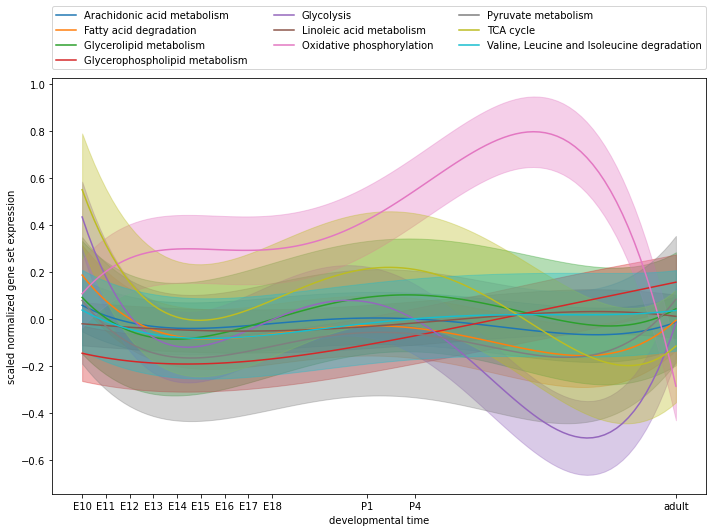

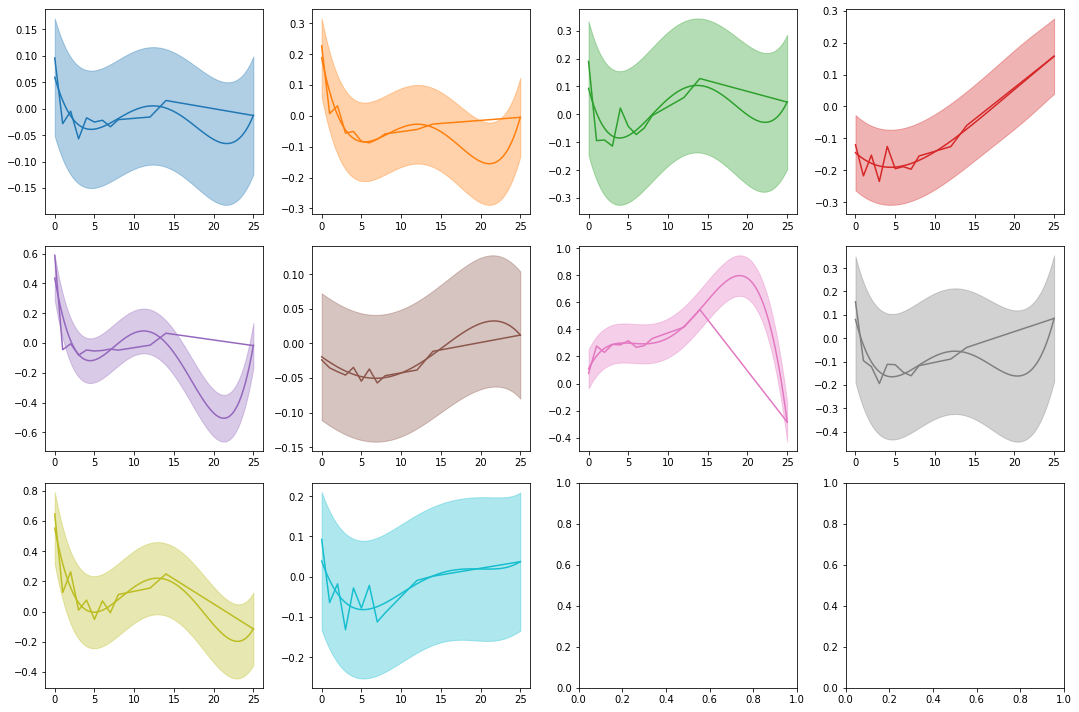

In [45]:
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
import numpy as np
import seaborn as sns

#colors = sns.color_palette('husl', pathway_genes.pathway.nunique())
colors = sns.color_palette('tab10')
dev_stages = ['E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'P1', 'P4', 'adult']
pseudotime = [0, 1, 2, 3, 4, 5, 6, 7, 8, 12, 14, 25]
class_labels = [
    'Progenitors', 
    'Immature Glutamatergic',
    'Immature Glutamatergic',
    'Immature Glutamatergic',
    'Mature Glutamatergic',
    'Mature Glutamatergic',
    'Mature Glutamatergic',
    'Mature Glutamatergic',
    'Mature Glutamatergic',
    'Mature Glutamatergic',
    'Mature Glutamatergic',
    'Mature Glutamatergic'
]
subsample = True
nsamples = 100 # controls the number of cells sampled for each datapoint
multiple = 4 # controls the coarsened of the predictions
order = 4 # order of the polynomial to fit
fig1, ax1 = plt.subplots()
fig2, axs = plt.subplots(3, 4)
axs = axs.reshape(12)
for j, (pathway, group_df) in enumerate(pathway_genes.groupby('pathway')):
    y_arr = np.empty(shape = 0)
    x_arr = np.empty(shape = 0)
    mean_means = []
    for i, dev_stage, class_label in zip(pseudotime, dev_stages, class_labels):
        means = adata[
            (adata.obs.developmental_stage == dev_stage) &
            (adata.obs.class_label == class_label),
            adata.var.index.isin(group_df.genesymbol)
        ].X.mean(axis = 1)
        
        if subsample:
            means = np.random.choice(
                means,
                nsamples
            )
            
        y_arr = np.concatenate(
            [
                y_arr,
                means
            ]
        )
        x_arr = np.concatenate(
            [
                x_arr,
                np.repeat(i, len(means))
            ]
        )
        mean_means.append(means.mean())
        
    # see also https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge_curvefit.html
    reg = BayesianRidge(
        tol=1e-3,
        compute_score = True
    )
    reg.fit(
        np.vander(
            x_arr, 
            order + 1, 
            increasing = True
        ), 
        y_arr
    )
    
    stepsize = len(dev_stage) / (len(dev_stage) * multiple)
    x = np.arange(
        pseudotime[0], 
        pseudotime[-1] + stepsize, 
        step = stepsize
    )
    ymean, ystd = reg.predict(
        np.vander(
            x,
            order + 1,
            increasing = True
        ),
        return_std = True
    )
    for k, ax in enumerate([ax1, axs[j]]):
        ax.fill_between(
            x, 
            ymean - ystd, 
            ymean + ystd, 
            color = colors[j], 
            alpha = 0.35
        )
        ax.plot(
            x,
            ymean,
            label = pathway,
            color = colors[j]
        )
        if k:
            ax.plot(pseudotime, mean_means, color = colors[j])

ax1.legend(
    bbox_to_anchor = (0., 1.02, 1., .102), 
    loc = 'lower left',
    ncol = 3, 
    mode = 'expand', 
    borderaxespad=0.
)
ax1.set_ylabel('scaled normalized gene set expression')
ax1.set_xlabel('developmental time')
ax1.set_xticks(pseudotime)
ax1.set_xticklabels(dev_stages)
fig1.set_figheight(7.5)
fig1.set_figwidth(10)
fig1.tight_layout()
fig2.set_figheight(10)
fig2.set_figwidth(15)
fig2.tight_layout()